# Training Models


Imports


In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn import tree
import pickle

In [70]:
df = pd.read_csv("../Data/cleaned_dataset.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 47 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 4826 non-null   float64
 1   IsMale                                              4826 non-null   int64  
 2   AvgPrice                                            4826 non-null   float64
 3   RiskRate_High                                       4826 non-null   int64  
 4   RiskRate_Low                                        4826 non-null   int64  
 5   RiskRate_Medium                                     4826 non-null   int64  
 6   RiskRate_NotAssigned                                4826 non-null   int64  
 7   AvgOrderRate_Difference_Constant                    4826 non-null   int64  
 8   AvgOrderRate_Difference_Decreased                   4826 non-null   int64  
 9

In [73]:
train_df = pd.read_csv("../Data/TrainSet.csv")

In [74]:
test_df = pd.read_csv("../Data/TestSet.csv")

Get the training features and label


In [75]:
X_train = train_df.iloc[:, :-1].to_numpy()
y_train = train_df.iloc[:, -1].to_numpy()

Get the testing features and label


In [76]:
X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1].to_numpy()

Initialize a 5-fold cross-validation object


In [77]:
KF = KFold(n_splits=5)

## KNN


In [78]:
KNN = KNeighborsClassifier()

In [79]:
param_grid = {"n_neighbors": list(range(1, int(np.sqrt(len(X_train))), 2))}

In [80]:
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=KF, verbose=2)

In [81]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             verbose=2)

In [82]:
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 33}


In [83]:
KNN_best = KNeighborsClassifier(**best_params)

In [84]:
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [85]:
predictions = KNN_best.predict(X_test)

In [86]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71       518
           1       0.68      0.42      0.52       448

    accuracy                           0.64       966
   macro avg       0.65      0.63      0.62       966
weighted avg       0.65      0.64      0.62       966



## Naive Bayes


In [87]:
NB = GaussianNB()

In [88]:
precisions = []
recalls = []
accuracies = []
f1_scores = []

In [89]:
fold = 1
for train, test in KF.split(X_train, y_train):
    print(f"##### FOLD: {fold} #####")

    # Fit the model
    NB.fit(X_train[train], y_train[train])

    # Predict on the test set
    predictions = NB.predict(X_train[test])

    # Evaluate the model
    precision = precision_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    recall = recall_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    accuracy = accuracy_score(y_true=y_train[test], y_pred=predictions)
    f1 = f1_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )

    # Store the result
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Print the scores for each fold
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"Accuracy = {accuracy}")
    print(f"F1 score = {f1}\n")

    fold += 1

##### FOLD: 1 #####
Precision = 0.6424099032780759
Recall = 0.6217616580310881
Accuracy = 0.6217616580310881
F1 score = 0.5916923371054916

##### FOLD: 2 #####
Precision = 0.6589398603691308
Recall = 0.6178756476683938
Accuracy = 0.6178756476683938
F1 score = 0.5689579621261978

##### FOLD: 3 #####
Precision = 0.6301537419544327
Recall = 0.6010362694300518
Accuracy = 0.6010362694300518
F1 score = 0.5643992838595701

##### FOLD: 4 #####
Precision = 0.6575672814032444
Recall = 0.5971502590673575
Accuracy = 0.5971502590673575
F1 score = 0.5322367045902081

##### FOLD: 5 #####
Precision = 0.6759369112105511
Recall = 0.6489637305699482
Accuracy = 0.6489637305699482
F1 score = 0.6057907506548132



In [90]:
print("Mean Scores:")
print(f"Mean Precision = {np.mean(precisions)}")
print(f"Mean Recall = {np.mean(recalls)}")
print(f"Mean Accuracy = {np.mean(accuracies)}")
print(f"Mean F1 score = {np.mean(f1_scores)}")

Mean Scores:
Mean Precision = 0.653001539643087
Mean Recall = 0.6173575129533678
Mean Accuracy = 0.6173575129533678
Mean F1 score = 0.5726154076672562


In [91]:
predictions = NB.predict(X_test)

In [92]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.61      0.91      0.73       518
           1       0.75      0.33      0.46       448

    accuracy                           0.64       966
   macro avg       0.68      0.62      0.59       966
weighted avg       0.67      0.64      0.60       966



## CART


In [93]:
Cart = DecisionTreeClassifier()

In [94]:
param_grid = {
    "max_depth": [None, 10, 20, 30],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
    "ccp_alpha": [0, 1, 0.01, 0.001],
    "min_samples_split": [2, 3, 4],
}

In [95]:
grid_search = GridSearchCV(estimator=Cart, param_grid=param_grid, cv=KF, verbose=2)

In [96]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s


[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0, class_we

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 1, 0.01, 0.001],
                         'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1.5, 1: 2.5}, {0: 1.5, 1: 3}],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [97]:
best_params = grid_search.best_params_
print(best_params)

{'ccp_alpha': 0.001, 'class_weight': None, 'max_depth': 10, 'min_samples_split': 4}


In [98]:
Cart_best = DecisionTreeClassifier(**best_params)

In [99]:
Cart_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_split=4)

In [100]:
predictions = Cart_best.predict(X_test)

In [101]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       518
           1       0.64      0.54      0.59       448

    accuracy                           0.65       966
   macro avg       0.65      0.64      0.64       966
weighted avg       0.65      0.65      0.65       966



[Text(0.625, 0.9444444444444444, 'x[21] <= 0.5\ngini = 0.497\nsamples = 3860\nvalue = [2082, 1778]'),
 Text(0.40384615384615385, 0.8333333333333334, 'x[2] <= 2.62\ngini = 0.482\nsamples = 3261\nvalue = [1939, 1322]'),
 Text(0.19230769230769232, 0.7222222222222222, 'x[16] <= 0.5\ngini = 0.497\nsamples = 1921\nvalue = [1034, 887]'),
 Text(0.15384615384615385, 0.6111111111111112, 'x[23] <= 0.5\ngini = 0.496\nsamples = 1875\nvalue = [1026, 849]'),
 Text(0.07692307692307693, 0.5, 'x[2] <= 0.608\ngini = 0.478\nsamples = 846\nvalue = [512, 334]'),
 Text(0.038461538461538464, 0.3888888888888889, 'gini = 0.465\nsamples = 49\nvalue = [18, 31]'),
 Text(0.11538461538461539, 0.3888888888888889, 'x[0] <= 3.651\ngini = 0.471\nsamples = 797\nvalue = [494, 303]'),
 Text(0.07692307692307693, 0.2777777777777778, 'x[12] <= 0.5\ngini = 0.498\nsamples = 207\nvalue = [110, 97]'),
 Text(0.038461538461538464, 0.16666666666666666, 'gini = 0.49\nsamples = 107\nvalue = [46.0, 61.0]'),
 Text(0.11538461538461539, 0

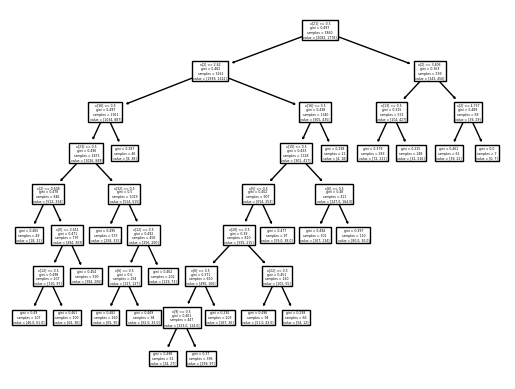

In [102]:
tree.plot_tree(Cart_best)

## Random Forest


In [103]:
RF = RandomForestClassifier(n_jobs=5)

In [104]:
param_grid = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "class_weight": [
        None,
        "balanced",
        "balanced_subsample",
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
    "ccp_alpha": [0, 1, 0.01, 0.001],
}

In [105]:
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=KF, verbose=2)

In [106]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=5),
             param_grid={'ccp_alpha': [0, 1, 0.01, 0.001],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample', {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1.5, 1: 2.5},
                                          {0: 1.5, 1: 3}],
                         'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=2)

In [107]:
best_params = grid_search.best_params_
print(best_params)

{'ccp_alpha': 0, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'n_estimators': 200}


In [108]:
RF_best = RandomForestClassifier(**best_params)

In [109]:
RF_best.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0, class_weight='balanced_subsample',
                       max_depth=10, n_estimators=200)

In [110]:
predictions = RF_best.predict(X_test)

In [111]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       518
           1       0.63      0.54      0.58       448

    accuracy                           0.64       966
   macro avg       0.64      0.63      0.63       966
weighted avg       0.64      0.64      0.64       966



## Logistic Regression


In [112]:
LR = LogisticRegression(n_jobs=5)

In [113]:
param_grid = {
    "tol": [0.001, 0.0001, 0.00001],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [2000, 6000, 10000],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
}

In [114]:
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=KF, verbose=2)

In [115]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.4s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   0.4s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=1e

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=   0.2s
[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=1e-05; total time=   1.1s
[CV] END class_weight=None, max_iter=6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=1e-05; total time=   1.1s
[CV] END class_weight=None,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.2s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=1e-05; total time=   0.2s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_it

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2},

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.2s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3},

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.2s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.2s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.2s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.2s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(n_jobs=5),
             param_grid={'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1.5, 1: 2.5}, {0: 1.5, 1: 3}],
                         'max_iter': [2000, 6000, 10000],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [116]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'max_iter': 2000, 'solver': 'liblinear', 'tol': 0.001}


In [117]:
LR_best = LogisticRegression(**best_params)

In [118]:
LR_best.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='liblinear', tol=0.001)

In [119]:
predictions = LR_best.predict(X_test)

In [120]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70       518
           1       0.66      0.50      0.57       448

    accuracy                           0.65       966
   macro avg       0.65      0.64      0.64       966
weighted avg       0.65      0.65      0.64       966



## SVM


In [121]:
SVM = SVC()

In [122]:
param_grid = {
    "tol": [0.001, 0.0001, 0.00001],
    "kernel": ["poly", "rbf", "sigmoid"],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 2.5},
        {0: 1.5, 1: 2.5},
        {0: 1, 1: 3},
    ],
}

In [123]:
grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=KF, verbose=2)

In [124]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.4s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=1e-05; total time=   0.2s
[CV] END ..........class_weight=None, kernel=po

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 2.5},
                                          {0: 1.5, 1: 2.5}, {0: 1, 1: 3}],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [125]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'kernel': 'rbf', 'tol': 0.001}


In [126]:
SVM_best = SVC(**best_params)

In [127]:
SVM_best.fit(X_train, y_train)

SVC()

In [128]:
predictions = SVM_best.predict(X_test)

In [129]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       518
           1       0.72      0.41      0.53       448

    accuracy                           0.65       966
   macro avg       0.68      0.64      0.63       966
weighted avg       0.67      0.65      0.63       966



## Neural Network


In [130]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, mode="min", verbose=1)

In [131]:
nn = Sequential()
nn.add(Dense(256, activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1, activation="sigmoid"))

nn.compile(optimizer="adam", loss="binary_crossentropy")

In [132]:
precisions = []
recalls = []
accuracies = []
f1_scores = []

In [133]:
fold = 1
for train, test in KF.split(X_train, y_train):
    print(f"##### FOLD: {fold} #####")

    # Fit the model
    nn.fit(
        X_train[train],
        y_train[train],
        epochs=200,
        batch_size=32,
        validation_data=(X_train[test], y_train[test]),
        callbacks=[early_stopping],
        verbose=0,
    )

    # Predict on the test set
    y_pred = nn.predict(X_train[test])

    predictions = []
    for pred in y_pred:
        if pred > 0.5:
            predictions.append(1)
        else:
            predictions.append(0)

    # Evaluate the model
    precision = precision_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    recall = recall_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    accuracy = accuracy_score(y_true=y_train[test], y_pred=predictions)
    f1 = f1_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )

    # Store the result
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Print the scores for each fold
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"Accuracy = {accuracy}")
    print(f"F1 score = {f1}\n")

    fold += 1

##### FOLD: 1 #####
Epoch 17: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
Precision = 0.6573342669872188
Recall = 0.6580310880829016
Accuracy = 0.6580310880829016
F1 score = 0.655516387806312

##### FOLD: 2 #####
Epoch 13: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step
Precision = 0.7040140019738466
Recall = 0.6955958549222798
Accuracy = 0.6955958549222798
F1 score = 0.6865000015896805

##### FOLD: 3 #####
Epoch 10: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
Precision = 0.6667788395479946
Recall = 0.667098445595855
Accuracy = 0.667098445595855
F1 score = 0.6666862325734351

##### FOLD: 4 #####
Epoch 11: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
Precision = 0.6978306536582285
Recall = 0.6955958549222798
Accuracy = 0.6955958549222798
F1 score = 0.6919487191837997

##### FOLD: 5 #####
Epoch 12: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
Precision = 0.7230300092381505
Recall = 0.7227979274611399
Accuracy = 0.7227979274611399
F1 s

In [134]:
print("Mean Scores:")
print(f"Mean Precision = {np.mean(precisions)}")
print(f"Mean Recall = {np.mean(recalls)}")
print(f"Mean Accuracy = {np.mean(accuracies)}")
print(f"Mean F1 score = {np.mean(f1_scores)}")

Mean Scores:
Mean Precision = 0.6897975542810878
Mean Recall = 0.6878238341968912
Mean Accuracy = 0.6878238341968912
Mean F1 score = 0.6835302961694077


In [135]:
y_pred = nn.predict(X_test)

predictions = []
for pred in y_pred:
    if pred > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [136]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       518
           1       0.65      0.49      0.56       448

    accuracy                           0.64       966
   macro avg       0.64      0.63      0.63       966
weighted avg       0.64      0.64      0.63       966



## Save Best Model


In [137]:
with open("../RandomForestModel.pkl", "wb") as f:
    pickle.dump(RF_best, f)